In [173]:
#Feature Seelction with Random Forest
#loading the libraries
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

In [174]:
#importing the dataset
dataset =pd.read_csv('combined_csv.csv')
dataset

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2830738,53,32215,4,2,112,152,28,28,28.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2830739,53,324,2,2,84,362,42,42,42.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2830740,58030,82,2,1,31,6,31,0,15.5,21.92031,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2830741,53,1048635,6,2,192,256,32,32,32.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [175]:
df = dataset

In [176]:
#dropping irrelevant columns
df = df.drop(columns=[' Bwd PSH Flags', ' Bwd URG Flags', 'Fwd Avg Bytes/Bulk', ' Fwd Avg Packets/Bulk', ' Fwd Avg Bulk Rate',
       ' Bwd Avg Bytes/Bulk', ' Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate'])

In [177]:
#Taking care of missing values
df = df.dropna(axis=0, how='any')
df.isnull().sum().sum()

0

In [178]:
#Replacing inf values with nan
df = df.replace([np.inf, -np.inf], np.nan)
df.isnull().sum().sum()

3018

In [179]:
#dropping nan values
df = df.dropna(axis=0, how='any')
df.isnull().sum().sum()

0

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2827876 entries, 0 to 2830742
Data columns (total 71 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0    Destination Port             int64  
 1    Flow Duration                int64  
 2    Total Fwd Packets            int64  
 3    Total Backward Packets       int64  
 4   Total Length of Fwd Packets   int64  
 5    Total Length of Bwd Packets  int64  
 6    Fwd Packet Length Max        int64  
 7    Fwd Packet Length Min        int64  
 8    Fwd Packet Length Mean       float64
 9    Fwd Packet Length Std        float64
 10  Bwd Packet Length Max         int64  
 11   Bwd Packet Length Min        int64  
 12   Bwd Packet Length Mean       float64
 13   Bwd Packet Length Std        float64
 14  Flow Bytes/s                  float64
 15   Flow Packets/s               float64
 16   Flow IAT Mean                float64
 17   Flow IAT Std                 float64
 18   Flow IAT Max         

In [105]:
#dropping features with importance threshold less than 0.01 
df = df.drop(df.columns[[42, 43, 47, 48, 63, 67]], axis=1)

In [181]:
df = df.drop(df.columns[[9, 16, 34, 21, 15, 23, 2, 66, 69, 3, 45, 19, 20, 36,
                         17, 1, 7, 41, 65, 49, 46, 29, 27, 26, 25, 28, 64, 62, 30,
                         31, 42, 43, 47, 48, 63, 67]], axis=1)

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2827876 entries, 0 to 2830742
Data columns (total 35 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0    Destination Port             int64  
 1   Total Length of Fwd Packets   int64  
 2    Total Length of Bwd Packets  int64  
 3    Fwd Packet Length Max        int64  
 4    Fwd Packet Length Mean       float64
 5   Bwd Packet Length Max         int64  
 6    Bwd Packet Length Min        int64  
 7    Bwd Packet Length Mean       float64
 8    Bwd Packet Length Std        float64
 9   Flow Bytes/s                  float64
 10   Flow IAT Max                 int64  
 11   Fwd IAT Std                  float64
 12   Fwd IAT Min                  int64  
 13   Fwd Header Length            int64  
 14   Bwd Header Length            int64  
 15   Bwd Packets/s                float64
 16   Max Packet Length            int64  
 17   Packet Length Mean           float64
 18   Packet Length Std    

In [183]:
df2 = df[' Label']
feat = df2.values
#feat_names = feat.tolist()
#feat_names
label = df2.unique()
label

array(['BENIGN', 'DDoS', 'PortScan', 'Bot', 'Infiltration',
       'Web Attack Brute Force', 'Web Attack XSS',
       'Web Attack Sql Injection', 'FTP-Patator', 'SSH-Patator',
       'DoS slowloris', 'DoS Slowhttptest', 'DoS Hulk', 'DoS GoldenEye',
       'Heartbleed'], dtype=object)

In [184]:
#splitting the dataset
X = df.iloc[:, :-1].values
y = df.iloc[:, 34].values

In [185]:
y

array(['BENIGN', 'BENIGN', 'BENIGN', ..., 'BENIGN', 'BENIGN', 'BENIGN'],
      dtype=object)

In [186]:
#down-sampling the majority class
Down_Dic = {'BENIGN': 250000,
            'DoS Hulk': 230124,
            'PortScan': 158804,
            'DDoS': 128025,
            'DoS GoldenEye': 10293,
            'FTP-Patator': 7935,
            'SSH-Patator': 5897,
            'DoS slowloris': 5796,
           'DoS Slowhttptest': 5499,
           'Bot': 1956,
           'Web Attack Brute Force': 1507,
           'Web Attack XSS': 652,
           'Infiltration': 36,
           'Web Attack Sql Injection': 21,
           'Heartbleed': 11}

In [187]:
DownSamp = RandomUnderSampler(sampling_strategy=Down_Dic, random_state=0)
X,y=DownSamp.fit_sample(X,y)

In [188]:
#up-sampling the minority class
UP_Dic = {'BENIGN': 250000,
            'DoS Hulk': 230124,
            'PortScan': 158804,
            'DDoS': 128025,
            'DoS GoldenEye': 10293,
            'FTP-Patator': 7935,
           'SSH-Patator': 5897,
           'DoS slowloris': 5796,
           'DoS Slowhttptest': 5499,
           'Bot': 5000,
           'Web Attack Brute Force': 5000,
           'Web Attack XSS': 5000,
           'Infiltration': 5000,
           'Web Attack Sql Injection': 5000,
           'Heartbleed': 5000}

In [189]:
UpSamp = SMOTE(sampling_strategy=UP_Dic, random_state=0)
X,y=UpSamp.fit_sample(X,y)

In [190]:
#Encoding categorical dependent variable
y = pd.get_dummies(y)

In [191]:
#splitting the dataset into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [192]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [193]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 25, init = 'uniform', activation = 'relu', input_dim = 34))

D:\Users\adelola\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=34, units=25, kernel_initializer="uniform")`
  """


In [194]:
# Adding the second hidden layer
classifier.add(Dense(output_dim = 25, init = 'uniform', activation = 'relu'))

D:\Users\adelola\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=25, kernel_initializer="uniform")`
  


In [195]:
# Adding the output layer
classifier.add(Dense(output_dim = 15, init = 'uniform', activation = 'softmax'))

D:\Users\adelola\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=15, kernel_initializer="uniform")`
  


In [196]:
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [197]:
# Fitting the ANN to the Training set
#classifier.fit(X_train, y_train, batch_size = 128, nb_epoch = 100)
history = classifier.fit(X_train, y_train, validation_split=0.33, epochs=100, batch_size=128, verbose=0)

In [198]:
# list all data in history
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


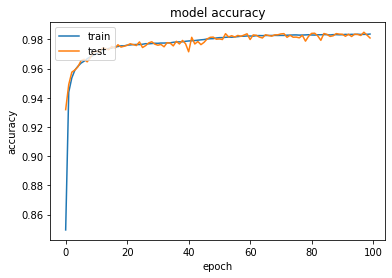

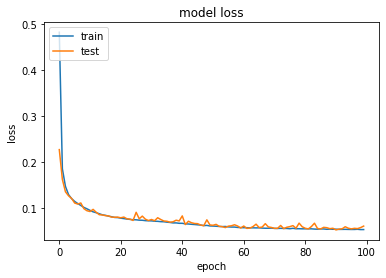

In [199]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [200]:
# evaluate the model
cvscores = []
scores = classifier.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (classifier.metrics_names[1], scores[1]*100))
cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

acc: 98.11%
98.11% (+/- 0.00%)


In [201]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.7)

In [ ]:
#Applying k-fold cross validation
#from sklearn.model_selection import cross_val_score
#accuracies = cross_val_score(classifier, X = X_train, y = y_train, cv = 10, n_jobs= -1, scoring="accuracy")

In [43]:
#pred = classifier.predict(X_test)
#pred = np.argmax(pred, axis=1)

In [202]:
from sklearn import metrics

from sklearn.metrics import accuracy_score 
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9723641635163709

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_compare, y_pred)
#cm = confusion_matrix(
#    y_test.values.argmax(axis=1), y_pred.argmax(axis=1))
#np.set_printoptions(precision=2)
#print(cm)
#plt.figure()
#plot_confusion_matrix(y_compare, y_pred)

# Making the Confusion Matrix
#from sklearn.metrics import multilabel_confusion_matrix  
#cm = multilabel_confusion_matrix(y_test, y_pred)
#cm

In [64]:
cm.shape

(15, 2, 2)

In [203]:
from sklearn.metrics import accuracy_score 
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9723641635163709

In [204]:
from sklearn.metrics import log_loss
score = log_loss(y_test, y_pred)
score

0.30938357241309

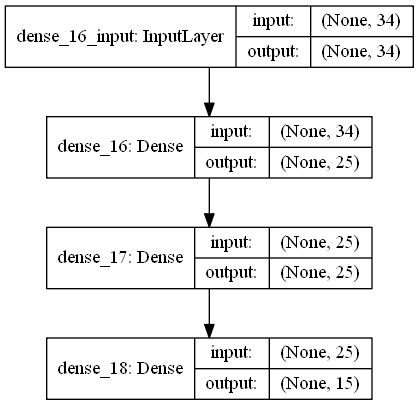

In [205]:
visualizing the structure of the DNN model
import os
from keras.utils.vis_utils import plot_model
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'


plot_model(classifier, to_file='classifier_plot.png', show_shapes=True, show_layer_names=True)

In [206]:
from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(y_test, y_pred) 
auc_score

0.9079761201660989

In [207]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred, average='macro') 
f1

0.8339908923927888

In [208]:
from sklearn.metrics import precision_score
precision_score = precision_score(y_test, y_pred, average='macro') 
precision_score

0.9663957579792753

In [209]:
from sklearn.metrics import recall_score
recall_score = recall_score(y_test, y_pred, average='macro') 
recall_score

0.8165528985437663

In [ ]:
#cros validation
#from sklearn.model_selection import cross_val_score
#from sklearn.model_selection import KFold
#kfold = KFold(n_splits=10, shuffle=True)
#results = cross_val_score(classifier, X, y, cv=kfold)
#print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

In [210]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    
    plt.figure(figsize=(20,10))

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[73965   437     3    11   449    21    15     0     0    19   150     1
      0     0     0]
 [  220  1232     0     0     0     0     0     0     0     0     0     0
      0     0     0]
 [   63     0 38347     0     0     0     0     0     0     0     0     0
      0     0     0]
 [   56     0     0  3024    17     0     0     0     0     0     0     0
      0     0     0]
 [  276     0     2     1 68834     0     0     0     0     0     0     0
      0     0     0]
 [   16     0     0     1     0  1583     8     0     0     1     0     0
      0     0     0]
 [   15     0     0     1     0     9  1744     0     0     0     0     0
      0     0     0]
 [    2     0     0     0     2     0     2  2360     0     0     0     0
      0     0     0]
 [    0     0     0     0     0     0     0     0  1426     0     0     0
      0     0     0]
 [   50     0     0     0     0     0     0     0     0  1466     0     0
      0     0     0]
 [   26   

<Figure size 432x288 with 0 Axes>

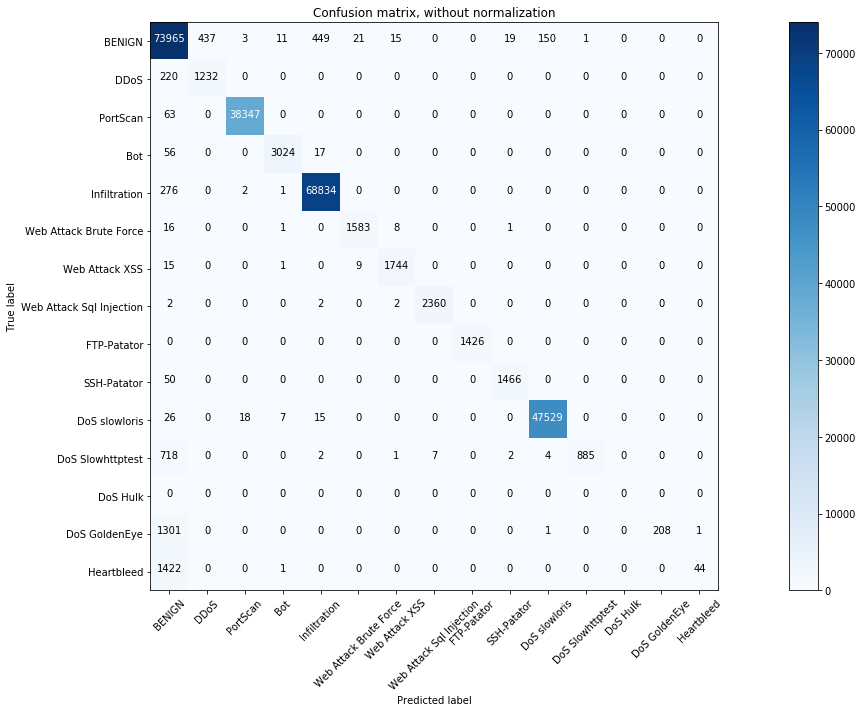

In [211]:

cnf_matrix = confusion_matrix(y_test.values.argmax(axis=1), y_pred.argmax(axis=1),labels=[0, 1, 2, 3, 4, 5, 6,
                                                                                         7, 8, 9, 10, 11, 12, 12, 14])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=label,
                      title='Confusion matrix, without normalization')